In [1]:
import pandas as pd
import news_injection
import stock_data_injection

import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)


2025-04-25 15:39:56,100 - INFO - StockPortfolioLogger - Configuration loaded successfully.
2025-04-25 15:39:56,383 - INFO - StockPortfolioLogger - Starting data injection process...
2025-04-25 15:39:56,385 - INFO - StockPortfolioLogger - Fetching news for AAPL
2025-04-25 15:39:56,391 - DEBUG - urllib3.connectionpool - Starting new HTTPS connection (1): finnhub.io:443
2025-04-25 15:39:56,983 - DEBUG - urllib3.connectionpool - https://finnhub.io:443 "GET /api/v1/company-news?symbol=AAPL&from=2020-01-03&to=2025-03-21&token=d04gfqpr01qspgm2scagd04gfqpr01qspgm2scb0 HTTP/1.1" 200 None
2025-04-25 15:39:57,194 - INFO - StockPortfolioLogger - AAPL → 238 articles fetched
2025-04-25 15:39:57,196 - INFO - StockPortfolioLogger - Fetching news for ADAP
2025-04-25 15:39:57,205 - DEBUG - urllib3.connectionpool - Starting new HTTPS connection (1): finnhub.io:443
2025-04-25 15:39:57,578 - DEBUG - urllib3.connectionpool - https://finnhub.io:443 "GET /api/v1/company-news?symbol=ADAP&from=2020-01-03&to=202

     ticker                                           headline  \
0      AAPL  Apple's AI shakeup: They might not be 'moving ...   
1      AAPL  Apple (AAPL) Eyes AI-Powered Future Despite De...   
2      AAPL  Apple, in effort to turn around Siri, shakes u...   
3      AAPL  Accenture reports Q2 beat, Apple TV+ losing $1...   
4      AAPL  Report: Apple Reassigns Siri Development to Vi...   
...     ...                                                ...   
5706   TMUS  T-Mobile Introduces Enticing 5G Internet Plans...   
5707   TMUS  Verizon Stock Hasn’t Done Great This Year. 2 R...   
5708   TMUS  T-Mobile Unveils New Home and Small Business I...   
5709   TMUS  After Hitting an  All-Time High, Is T-Mobile U...   
5710   TMUS  The Trump M&A Boom Is Coming. A Top Dealmaker ...   

                                                summary            datetime  \
0     Apple (AAPL) is shaking up its AI executives, ... 2025-03-21 23:45:00   
1     We recently published a list of 10 AI Stock

2025-04-25 15:40:08,611 - INFO - StockPortfolioLogger - Dow Jones data loaded successfully.
2025-04-25 15:40:08,646 - INFO - StockPortfolioLogger - NASDAQ data loaded successfully.
2025-04-25 15:40:08,680 - INFO - StockPortfolioLogger - S&P 500 data loaded successfully.
2025-04-25 15:40:08,699 - INFO - StockPortfolioLogger - Portfolio data loaded successfully.
2025-04-25 15:40:09,081 - INFO - StockPortfolioLogger - Portfolio prices data loaded successfully.
2025-04-25 15:40:09,083 - DEBUG - StockPortfolioLogger - Dow Jones 
         Date Ticker          Open          High           Low         Close  \
0  2020-01-02    DJI  28638.970703  28872.800781  28627.769531  28868.800781   
1  2020-01-03    DJI  28553.330078  28716.310547  28500.359375  28634.880859   
2  2020-01-06    DJI  28465.500000  28708.019531  28418.630859  28703.380859   
3  2020-01-07    DJI  28639.179688  28685.500000  28565.279297  28583.679688   
4  2020-01-08    DJI  28556.140625  28866.179688  28522.509766  28745.

In [2]:
portfolio= stock_data_injection.portfolio
portfolio_price= stock_data_injection.portfolio_price


In [3]:
news_data= news_injection.news_data
news_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    5713 non-null   object
 1   headline  5713 non-null   object
 2   summary   5632 non-null   object
 3   datetime  5713 non-null   object
 4   url       5713 non-null   object
 5   source    5713 non-null   object
dtypes: object(6)
memory usage: 267.9+ KB


In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticker    27 non-null     object 
 1   Quantity  27 non-null     int64  
 2   Sector    27 non-null     object 
 3   Close     27 non-null     float64
 4   Weight    27 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


In [5]:
#drop close from portfoli_data_clean
portfolio.drop('Close',axis=1, inplace= True)
portfolio.head()

,Ticker,Quantity,Sector,Weight
0,AAPL,1,IT,3.461290
1,ADAP,1,Pharmaceuticals,0.004615
2,AGCO,1,Agriculture,1.476206
3,BA,2,Military Engineering,2.824439
4,BG,4,Agriculture,1.161586


In [6]:
#drop close from portfoli_data_clean
news_data.drop('url',axis=1, inplace= True)
news_data.head()

,ticker,headline,summary,datetime,source
0,AAPL,Apple's AI shakeup: They might not be 'moving ...,"Apple (AAPL) is shaking up its AI executives, ...",2025-03-21 23:45:00,Yahoo
1,AAPL,Apple (AAPL) Eyes AI-Powered Future Despite De...,We recently published a list of 10 AI Stocks T...,2025-03-21 21:34:28,Yahoo
2,AAPL,"Apple, in effort to turn around Siri, shakes u...",Apple (AAPL) CEO Tim Cook lost faith in AI hea...,2025-03-21 17:17:22,Yahoo
3,AAPL,"Accenture reports Q2 beat, Apple TV+ losing $1...",The major indexes were fractionally higher nea...,2025-03-21 17:16:26,Yahoo
4,AAPL,Report: Apple Reassigns Siri Development to Vi...,Siri is no longer under AI chief John Giannand...,2025-03-21 16:51:44,Yahoo


In [7]:
#converting datetime to date in news dataset

news_data['datetime'] = pd.to_datetime(news_data['datetime'], errors= 'coerce').dt.date
news_data.rename(columns={'datetime':'date'}, inplace =True)
news_data= news_data[['date','ticker','headline', 'summary', 'source']]


In [8]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      5713 non-null   object
 1   ticker    5713 non-null   object
 2   headline  5713 non-null   object
 3   summary   5632 non-null   object
 4   source    5713 non-null   object
dtypes: object(5)
memory usage: 223.3+ KB


In [9]:
news_data

,date,ticker,headline,summary,source
0,2025-03-21,AAPL,Apple's AI shakeup: They might not be 'moving ...,"Apple (AAPL) is shaking up its AI executives, ...",Yahoo
1,2025-03-21,AAPL,Apple (AAPL) Eyes AI-Powered Future Despite De...,We recently published a list of 10 AI Stocks T...,Yahoo
2,2025-03-21,AAPL,"Apple, in effort to turn around Siri, shakes u...",Apple (AAPL) CEO Tim Cook lost faith in AI hea...,Yahoo
3,2025-03-21,AAPL,"Accenture reports Q2 beat, Apple TV+ losing $1...",The major indexes were fractionally higher nea...,Yahoo
4,2025-03-21,AAPL,Report: Apple Reassigns Siri Development to Vi...,Siri is no longer under AI chief John Giannand...,Yahoo
...,...,...,...,...,...
5708,2024-12-06,TMUS,T-Mobile Introduces Enticing 5G Internet Plans...,TMUS' new Internet plans aim to offer consiste...,Yahoo
5709,2024-12-06,TMUS,Verizon Stock Hasn’t Done Great This Year. 2 R...,Verizon Stock Hasn’t Done Great This Year. 2 R...,MarketWatch
5710,2024-12-05,TMUS,T-Mobile Unveils New Home and Small Business I...,"BELLEVUE, Wash., December 05, 2024--Today, T-M...",Yahoo
5711,2024-12-05,TMUS,"After Hitting an All-Time High, Is T-Mobile U...",T-Mobile US (NASDAQ: TMUS) is a top telecom st...,Yahoo


In [10]:
def dataframe_overview(df):
    #display basic information about dataframe 
    print('Dataframe Info:\n')
    df.info()

    #display the description of datframe 
    print('\n Dataframe Description:\n')
    print(df.describe())
    
    #display for the null value presrnt in the dataframe
    print("\n Check null value in Dataframe: \n")
    print(df.isnull().sum())

    #display for the duplicate values in the dataframe
    print('\n Check Duplicate values in Datafrme: \n')
    print(df.duplicated().sum())
    
    # display the unique values present in the Dataframe
    print('\n Check the unique values of dataframe: \n')
    print(df.nunique())

    #display the column details of each dataframe
    print('\n Column Description: \n')
    print(list(df.columns))

    # display the shape of each dataframe
    print('\n Shape of Dataframe (Rows,Colums):\n')
    print(df.shape)

    #display the data type of dataframe
    print('\n Data type of Each Column in Dataframe: \n ')
    print(df.dtypes)

    return 


In [11]:
# passing datafame to dataframe_overview 

print('\n Displaying the Overview of Portfolio dataframe: \n')
dataframe_overview(portfolio)


 Displaying the Overview of Portfolio dataframe: 

Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticker    27 non-null     object 
 1   Quantity  27 non-null     int64  
 2   Sector    27 non-null     object 
 3   Weight    27 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 996.0+ bytes

 Dataframe Description:

        Quantity     Weight
count  27.000000  27.000000
mean    2.814815   3.703704
std     1.687899   3.440767
min     1.000000   0.004615
25%     1.000000   1.445362
50%     2.000000   2.749114
75%     5.000000   4.772812
max     5.000000  15.228120

 Check null value in Dataframe: 

Ticker      0
Quantity    0
Sector      0
Weight      0
dtype: int64

 Check Duplicate values in Datafrme: 

0

 Check the unique values of dataframe: 

Ticker      27
Quantity     5
Sector      12
Weight      27
dt

In [12]:
print('\n Displaying the Overview of Portfolio Prices  dataframe: \n')
dataframe_overview(portfolio_price)


 Displaying the Overview of Portfolio Prices  dataframe: 

Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35397 entries, 0 to 35396
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      35397 non-null  object 
 1   Ticker    35397 non-null  object 
 2   Open      35397 non-null  float64
 3   High      35397 non-null  float64
 4   Low       35397 non-null  float64
 5   Close     35397 non-null  float64
 6   Adjusted  35397 non-null  float64
 7   Returns   35397 non-null  float64
 8   Volume    35397 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB

 Dataframe Description:

               Open          High           Low         Close      Adjusted  \
count  35397.000000  35397.000000  35397.000000  35397.000000  35397.000000   
mean     186.594800    188.743701    184.425315    186.603784    180.245549   
std      158.987921    160.594696    157.332765    158.981525

In [13]:
print('\n Displaying the Overview of News dataframe: \n')
dataframe_overview(news_data)


 Displaying the Overview of News dataframe: 

Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      5713 non-null   object
 1   ticker    5713 non-null   object
 2   headline  5713 non-null   object
 3   summary   5632 non-null   object
 4   source    5713 non-null   object
dtypes: object(5)
memory usage: 223.3+ KB

 Dataframe Description:

              date ticker                                           headline  \
count         5713   5713                                               5713   
unique         280     27                                               5185   
top     2025-03-21    SPY  My Dividend Stock Portfolio: New February Divi...   
freq           194    250                                                  9   

                                                  summary source  
count                       

In [14]:
def trim (df):

    #Strip the leading anf trailing whitespaces form column name 
    df.columns = df.columns .str.strip()

    # droping the duplicates rows
    df= df.drop_duplicates()

    #Convert all column name into lowercase 
    df.columns= df.columns.str.lower()

    # Convert all column names to lowercase for consistency
    df.columns = df.columns.str.lower()

    # Replace spaces in column names with underscores for easier access
    df.columns = df.columns.str.replace(' ', '_')

    # Select columns with object data types (categorical/textual data)
    df_obj = df.select_dtypes(['object'])

    # Convert object type columns to string and strip whitespace from each value
    df[df_obj.columns] = df_obj.apply(lambda x: x.astype(str).str.strip())

    # Print confirmation message after cleaning
    print("All column names cleaned, duplicates dropped, and text columns processed.")

    print("clean dataset \n")
    print(df.head())
    return df



In [15]:
# Applying the cleaning Function on all datafrmes avalible 

#Applying the trim fuction to portfolio dataframe.
print("\n Clean Portfolio Dataset")
portfolio_df= trim(portfolio)

#Applying the trim fuction to portfolio price dataframe.
print("\n Clean Portfolio Price Dataset")
portfolio_price_df= trim(portfolio_price)

#Applying the trim fuction to news dataframe.
print("\n Clean News Dataset")
news_data_df= trim(news_data)



 Clean Portfolio Dataset
All column names cleaned, duplicates dropped, and text columns processed.
clean dataset 

  ticker  quantity                sector    weight
0   AAPL         1                    IT  3.461290
1   ADAP         1       Pharmaceuticals  0.004615
2   AGCO         1           Agriculture  1.476206
3     BA         2  Military Engineering  2.824439
4     BG         4           Agriculture  1.161586

 Clean Portfolio Price Dataset
All column names cleaned, duplicates dropped, and text columns processed.
clean dataset 

         date ticker        open        high         low       close  \
0  2020-01-03    JPM  137.500000  139.229996  137.080002  138.339996   
1  2020-01-03     KO   54.320000   54.990002   54.090000   54.689999   
2  2020-01-03    LMT  404.019989  417.170013  403.000000  413.739990   
3  2020-01-03     MS   51.220001   51.450001   50.830002   51.200001   
4  2020-01-03   MSCI  262.200012  263.579987  259.269989  260.750000   

     adjusted   returns

In [16]:
portfolio_price_df

,date,ticker,open,high,low,close,adjusted,returns,volume
0,2020-01-03,JPM,137.500000,139.229996,137.080002,138.339996,119.874138,-0.013197,10386800
1,2020-01-03,KO,54.320000,54.990002,54.090000,54.689999,46.494698,-0.005455,11354500
2,2020-01-03,LMT,404.019989,417.170013,403.000000,413.739990,359.312317,0.035981,2990100
3,2020-01-03,MS,51.220001,51.450001,50.830002,51.200001,43.273079,-0.016142,6706000
4,2020-01-03,MSCI,262.200012,263.579987,259.269989,260.750000,248.019470,-0.019921,459700
...,...,...,...,...,...,...,...,...,...
35392,2025-03-21,ADAP,0.307000,0.310000,0.280000,0.291000,0.291000,0.039286,5008800
35393,2025-03-21,AAPL,211.559998,218.839996,211.279999,218.270004,218.270004,0.019477,93954500
35394,2025-03-21,SPY,559.280029,564.890015,558.030029,563.979980,563.979980,0.000330,83666800
35395,2025-03-21,HUM,266.140015,269.309998,263.230011,266.170013,266.170013,-0.002473,1963600


In [17]:
portfolio_df.dtypes

ticker       object
quantity      int64
sector       object
weight      float64
dtype: object

In [18]:
portfolio_price_df.dtypes

date         object
ticker       object
open        float64
high        float64
low         float64
close       float64
adjusted    float64
returns     float64
volume        int64
dtype: object

In [19]:
portfolio_merge= pd.merge(portfolio_price_df,portfolio_df,
                           on = ['ticker'],
                           how= "inner")

In [20]:
portfolio_merge

,date,ticker,open,high,low,close,adjusted,returns,volume,quantity,sector,weight
0,2020-01-03,JPM,137.500000,139.229996,137.080002,138.339996,119.874138,-0.013197,10386800,5,Finance,3.831729
1,2020-01-03,KO,54.320000,54.990002,54.090000,54.689999,46.494698,-0.005455,11354500,5,Food & Beverages,1.088958
2,2020-01-03,LMT,404.019989,417.170013,403.000000,413.739990,359.312317,0.035981,2990100,5,Military Engineering,6.972690
3,2020-01-03,MS,51.220001,51.450001,50.830002,51.200001,43.273079,-0.016142,6706000,1,Finance,1.905160
4,2020-01-03,MSCI,262.200012,263.579987,259.269989,260.750000,248.019470,-0.019921,459700,1,Finance,8.920984
...,...,...,...,...,...,...,...,...,...,...,...,...
35392,2025-03-21,ADAP,0.307000,0.310000,0.280000,0.291000,0.291000,0.039286,5008800,1,Pharmaceuticals,0.004615
35393,2025-03-21,AAPL,211.559998,218.839996,211.279999,218.270004,218.270004,0.019477,93954500,1,IT,3.461290
35394,2025-03-21,SPY,559.280029,564.890015,558.030029,563.979980,563.979980,0.000330,83666800,3,Finance,8.943502
35395,2025-03-21,HUM,266.140015,269.309998,263.230011,266.170013,266.170013,-0.002473,1963600,1,Healthcare,4.220880


In [21]:
dataframe_overview(news_data_df)

Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      5713 non-null   object
 1   ticker    5713 non-null   object
 2   headline  5713 non-null   object
 3   summary   5713 non-null   object
 4   source    5713 non-null   object
dtypes: object(5)
memory usage: 223.3+ KB

 Dataframe Description:

              date ticker                                           headline  \
count         5713   5713                                               5713   
unique         280     27                                               5185   
top     2025-03-21    SPY  My Dividend Stock Portfolio: New February Divi...   
freq           194    250                                                  9   

                                                  summary source  
count                                                5713   5713  
unique  

In [22]:
portfolio_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35397 entries, 0 to 35396
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      35397 non-null  object 
 1   ticker    35397 non-null  object 
 2   open      35397 non-null  float64
 3   high      35397 non-null  float64
 4   low       35397 non-null  float64
 5   close     35397 non-null  float64
 6   adjusted  35397 non-null  float64
 7   returns   35397 non-null  float64
 8   volume    35397 non-null  int64  
 9   quantity  35397 non-null  int64  
 10  sector    35397 non-null  object 
 11  weight    35397 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 3.2+ MB


In [23]:
news_data_df.dtypes

date        object
ticker      object
headline    object
summary     object
source      object
dtype: object

In [24]:
# now it time to merge the dataset that is portfolio_merge and news_data
merge_df= pd.merge(portfolio_merge,news_data_df,
                           on = ['ticker','date'],
                           how= "inner")


In [25]:
merge_df

,date,ticker,open,high,low,close,adjusted,returns,volume,quantity,sector,weight,headline,summary,source
0,2024-03-04,OSK,112.349998,113.400002,111.970001,112.000000,110.095268,0.001878,543000,3,Engineering,1.518863,Why This 1 Value Stock Could Be a Great Additi...,"Whether you're a value, growth, or momentum in...",Yahoo
1,2024-04-29,GRWG,2.230000,2.340000,2.220000,2.300000,2.300000,0.036036,1004200,2,Agriculture,0.020139,Bearish Sentiment Across The Cannabis Space - ...,Looking for stock market analysis and research...,Benzinga
2,2024-04-29,CALM,56.900002,58.060001,56.820000,57.660000,54.671650,0.013891,760400,5,Agriculture,1.414519,Cal-Maine Foods goes ex dividend tomorrow,Looking for stock market analysis and research...,Seeking Alpha
3,2024-04-30,GRWG,2.270000,3.040000,2.210000,2.990000,2.990000,0.300000,6572300,2,Agriculture,0.020139,10 Consumer Discretionary Stocks With Whale Al...,Looking for stock market analysis and research...,Benzinga
4,2024-04-30,GRWG,2.270000,3.040000,2.210000,2.990000,2.990000,0.300000,6572300,2,Agriculture,0.020139,Bullish Tuesday For Marijuana Stocks - Elixino...,Looking for stock market analysis and research...,Benzinga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2025-03-21,SPY,559.280029,564.890015,558.030029,563.979980,563.979980,0.000330,83666800,3,Finance,8.943502,Applied Materials: AI Agents Mean More DRAM,Applied Materials' leadership in HBM manufactu...,SeekingAlpha
5106,2025-03-21,SPY,559.280029,564.890015,558.030029,563.979980,563.979980,0.000330,83666800,3,Finance,8.943502,"March FOMC Meeting: Growth Slows, Inflation Ri...","At its March meeting, the Federal Open Market ...",SeekingAlpha
5107,2025-03-21,HUM,266.140015,269.309998,263.230011,266.170013,266.170013,-0.002473,1963600,1,Healthcare,4.220880,Humana's CenterWell Launches Gladstone Walmart...,The easy accessibility for patients will give ...,Yahoo
5108,2025-03-21,TMUS,254.440002,258.440002,254.330002,255.839996,255.839996,-0.004630,9207000,5,Telecommunications,4.057068,T-Mobile's Quarterly Subscriber Growth Estimat...,T-Mobile US (TMUS) is expected to add fewer po...,Yahoo


In [26]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string


In [27]:
custom_stopword = set(ENGLISH_STOP_WORDS)

In [28]:
def clean_text (text):
    if not isinstance(text,str):
        return ""
    
    # converting the text into lowe case 
    text=text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    
    # Remove punctuation and digits
    text = re.sub(r"[^a-z\s]", '', text)
    

     # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
   # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)

    # Replace multiple whitespaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove single characters
    text = re.sub(r'\b\w\b', '', text)

    # Remove extra whitespace after removing single characters
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove words with fewer than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    # Tokenize and remove stopwords

    # Remove mentions (words starting with @)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (remove the # symbol and the following word)
    text = re.sub(r'#\w+', '', text)

    # Remove numeric digits
    text = re.sub(r'\d+', '', text)
    words = text.split()
    filtered_words = [word for word in words if word not in custom_stopword]
    
    # Join back to string
    return ' '.join(filtered_words)



In [29]:
merge_df['headline']= merge_df['headline'].apply(clean_text)
merge_df['summary']= merge_df['summary'].apply(clean_text)
merge_df['source']= merge_df['source'].apply(clean_text)

In [30]:
merge_df.columns

Index(['date', 'ticker', 'open', 'high', 'low', 'close', 'adjusted', 'returns',
       'volume', 'quantity', 'sector', 'weight', 'headline', 'summary',
       'source'],
      dtype='object')

In [31]:
dataframe_overview(merge_df)

Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5110 non-null   object 
 1   ticker    5110 non-null   object 
 2   open      5110 non-null   float64
 3   high      5110 non-null   float64
 4   low       5110 non-null   float64
 5   close     5110 non-null   float64
 6   adjusted  5110 non-null   float64
 7   returns   5110 non-null   float64
 8   volume    5110 non-null   int64  
 9   quantity  5110 non-null   int64  
 10  sector    5110 non-null   object 
 11  weight    5110 non-null   float64
 12  headline  5110 non-null   object 
 13  summary   5110 non-null   object 
 14  source    5110 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 599.0+ KB

 Dataframe Description:

              open         high          low        close     adjusted  \
count  5110.000000  5110.000000  5110.000000  511

Visulization

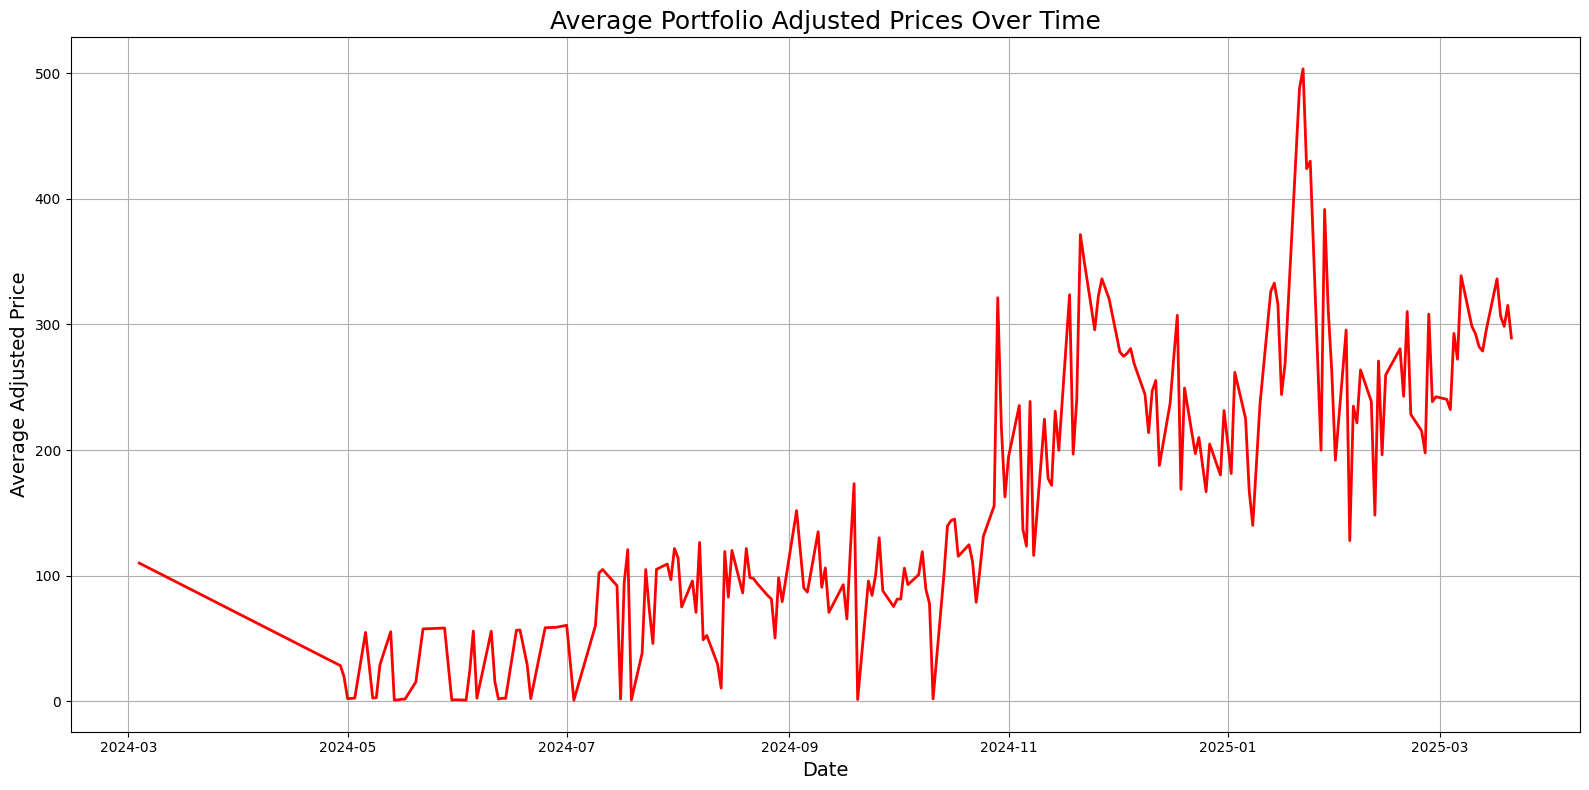

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is datetime
merge_df["date"] = pd.to_datetime(merge_df["date"])

# Group by date and compute average adjusted price
avg_prices = merge_df.groupby("date")["adjusted"].mean().reset_index()

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(avg_prices["date"], avg_prices["adjusted"], color='red', linewidth=2)

# Customize the plot
plt.title("Average Portfolio Adjusted Prices Over Time", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Adjusted Price", fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


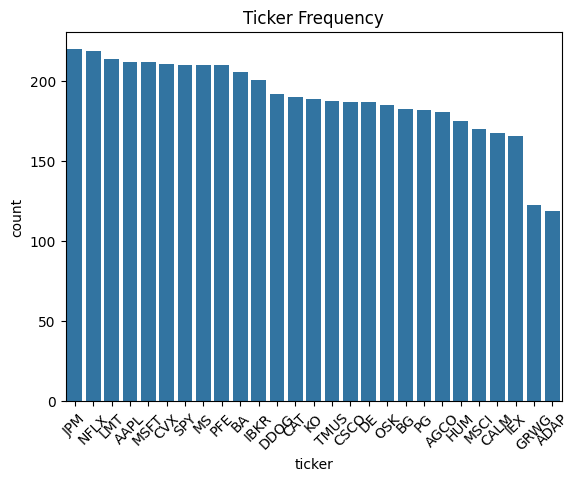

In [33]:
import seaborn as sns

sns.countplot(data= merge_df, x= 'ticker',
              order=merge_df['ticker'].value_counts().index)
plt.title('Ticker Frequency')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()


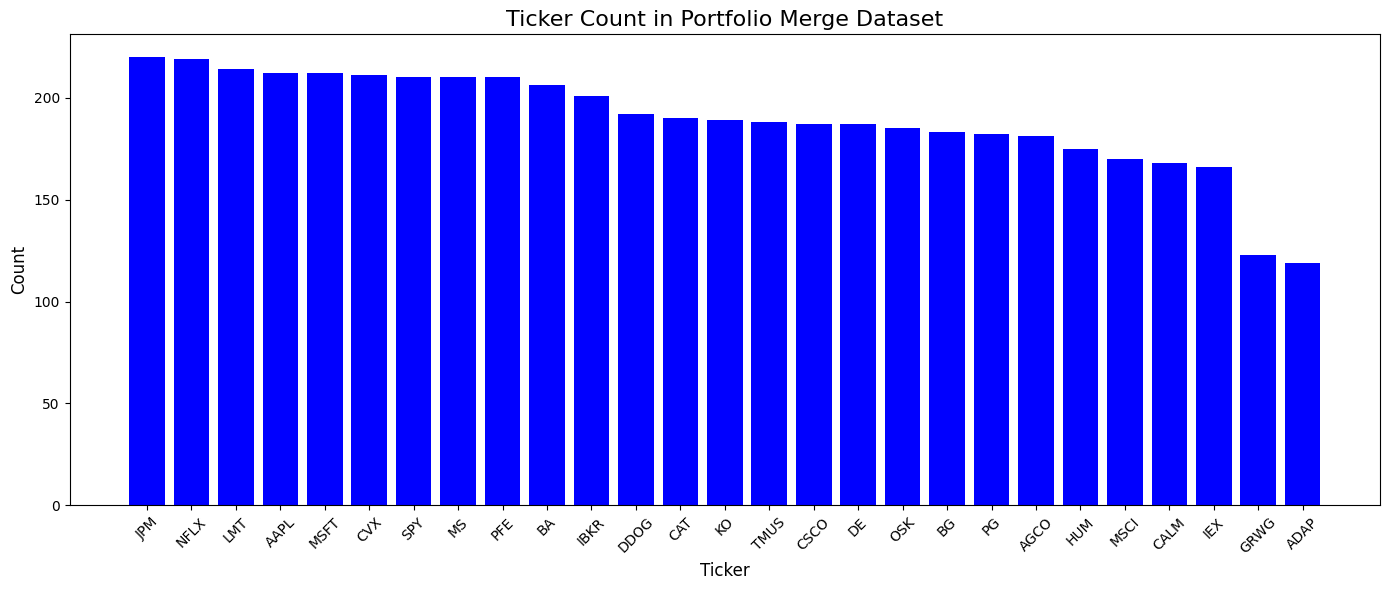

In [34]:
import matplotlib.pyplot as plt

# Count the frequency of each ticker
ticker_count = merge_df['ticker'].value_counts().reset_index()
ticker_count.columns = ['ticker', 'count']

# Create the bar plot
plt.figure(figsize=(14, 6))
plt.bar(ticker_count['ticker'], ticker_count['count'], color='blue')

# Add titles and labels
plt.title("Ticker Count in Portfolio Merge Dataset", fontsize=16)
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


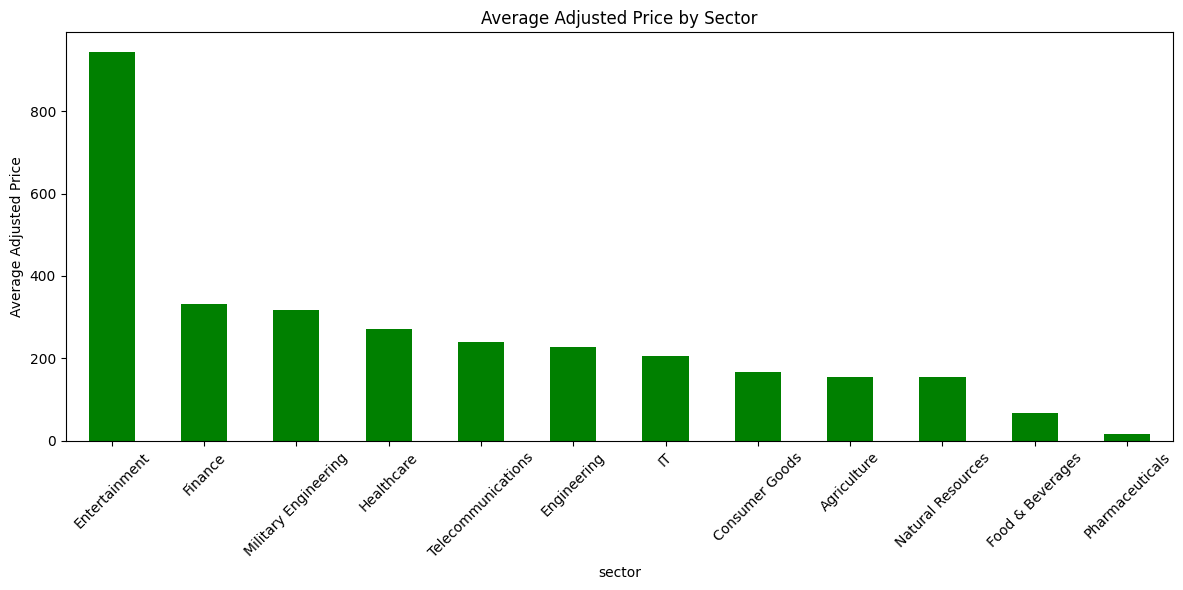

In [35]:
avg_sec_price =merge_df.groupby('sector')['adjusted'].mean().sort_values(ascending=False)
avg_sec_price.plot(kind='bar', figsize=(12, 6), color='green')
plt.title("Average Adjusted Price by Sector")
plt.ylabel("Average Adjusted Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


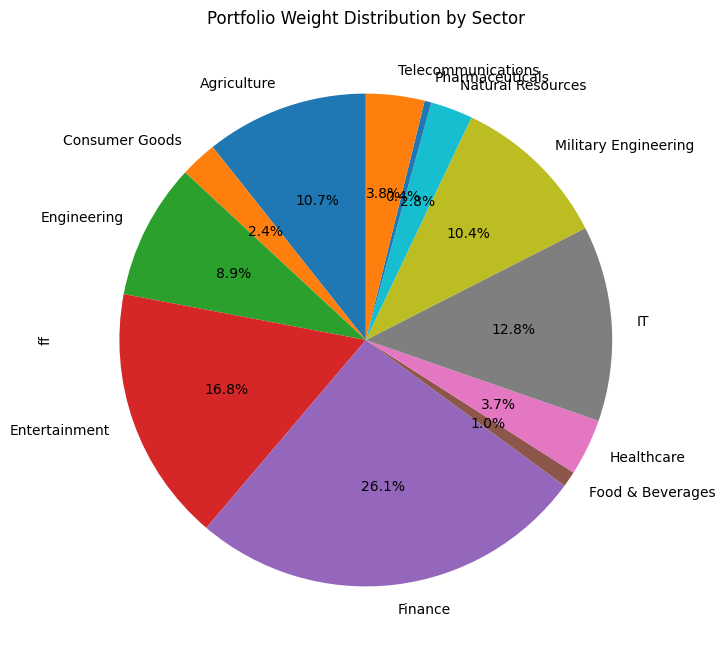

In [36]:

merge_df.groupby("sector")["weight"].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title("Portfolio Weight Distribution by Sector")
plt.ylabel("ff")  
plt.show()


In [43]:
from wordcloud import WordCloud 
def plot_ticker_and_news_visualization(df):
    df['ticker']= df['ticker'].astype(str)
    df['headline']= df['headline'].astype(str)
    df['summary'] =df['summary'].astype(str)

    # Word Cloud of Ticker Mentions
    ticker_text = ' '.join(df['ticker'])
    ticker_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(ticker_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(ticker_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Ticker Mentions in Headline")
    plt.show()


    # Word Cloud of All Tweets
    all_headline_text = ' '.join(df['headline'])
    headline_wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(all_headline_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(headline_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of All Headline")
    plt.show()

    # Word Cloud of All Tweets
    all_summary_text = ' '.join(df['headline'])
    summary_wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(all_summary_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(summary_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of All Summary")
    plt.show()
    #Bar Plot: Total Word Count of Headline Per Ticker
    df['word_count'] = df['headline'].apply(lambda x: len(x.split()))
    total_word_count_per_ticker = df.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

    plt.figure(figsize=(14, 8))
    plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')
    plt.title('Total Word Count of Headline per Ticker')
    # Add count labels on top of bars
    for i, count in enumerate(total_word_count_per_ticker):
        plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=45)
    plt.xlabel('Ticker')
    plt.ylabel('Total Word Count')

     #Bar Plot: Total Word Count of Summary Per Ticker
    df['word_count'] = df['summary'].apply(lambda x: len(x.split()))
    total_word_count_per_ticker = df.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

    plt.figure(figsize=(14, 8))
    plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')
    plt.title('Total Word Count of summary per Ticker')

    # Add count labels on top of bars
    for i, count in enumerate(total_word_count_per_ticker):
        plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=45)
    plt.xlabel('Ticker')
    plt.ylabel('Total Word Count')

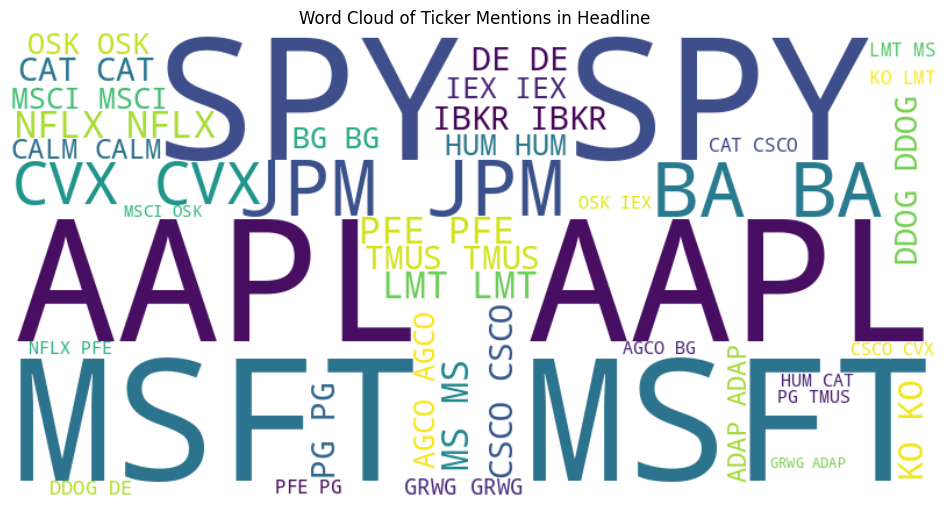

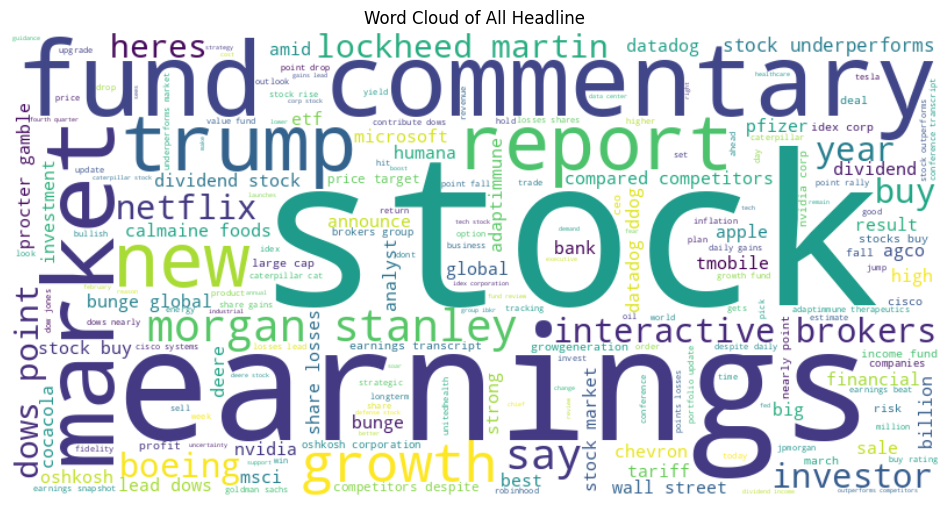

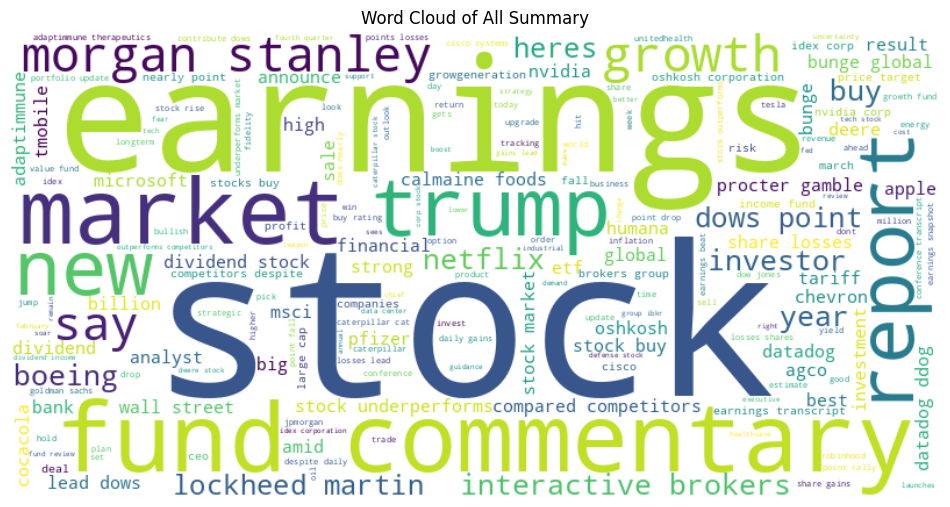

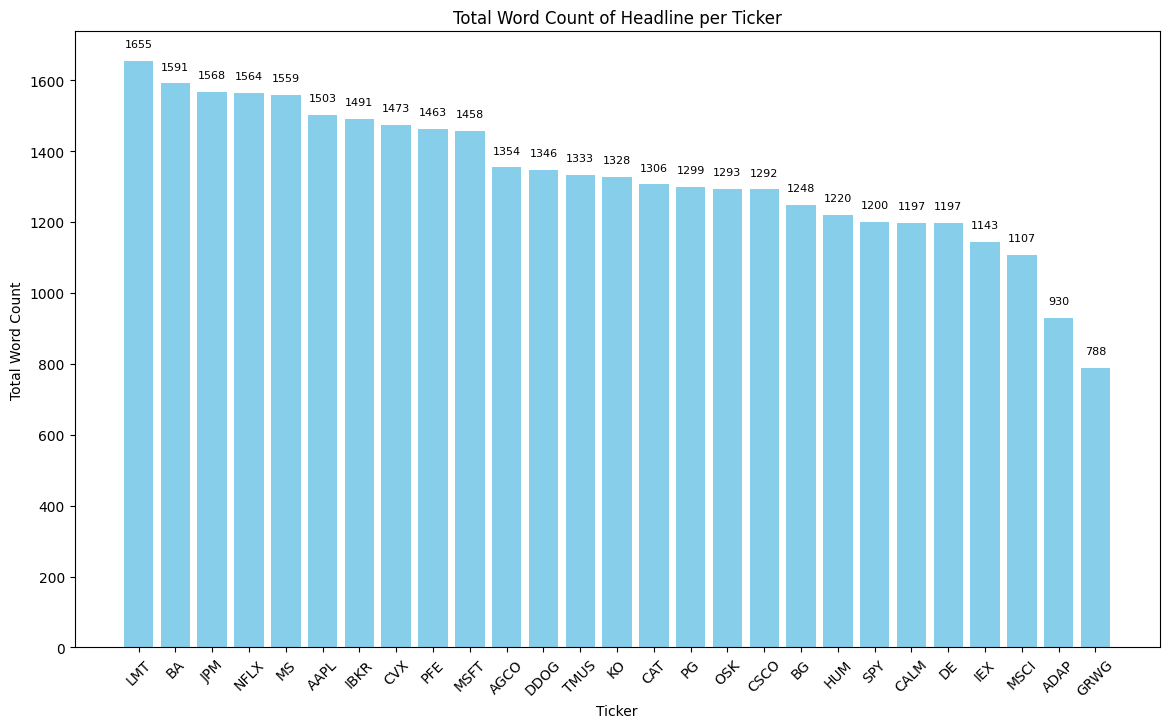

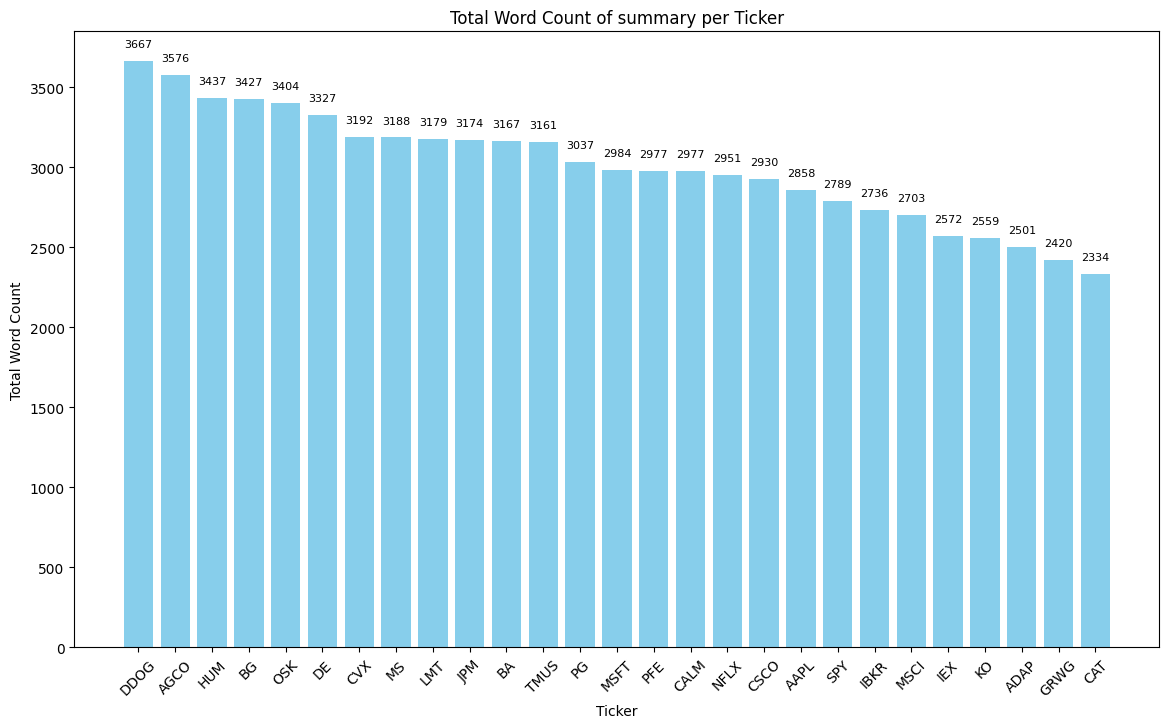

In [44]:
plot_ticker_and_news_visualization(merge_df)

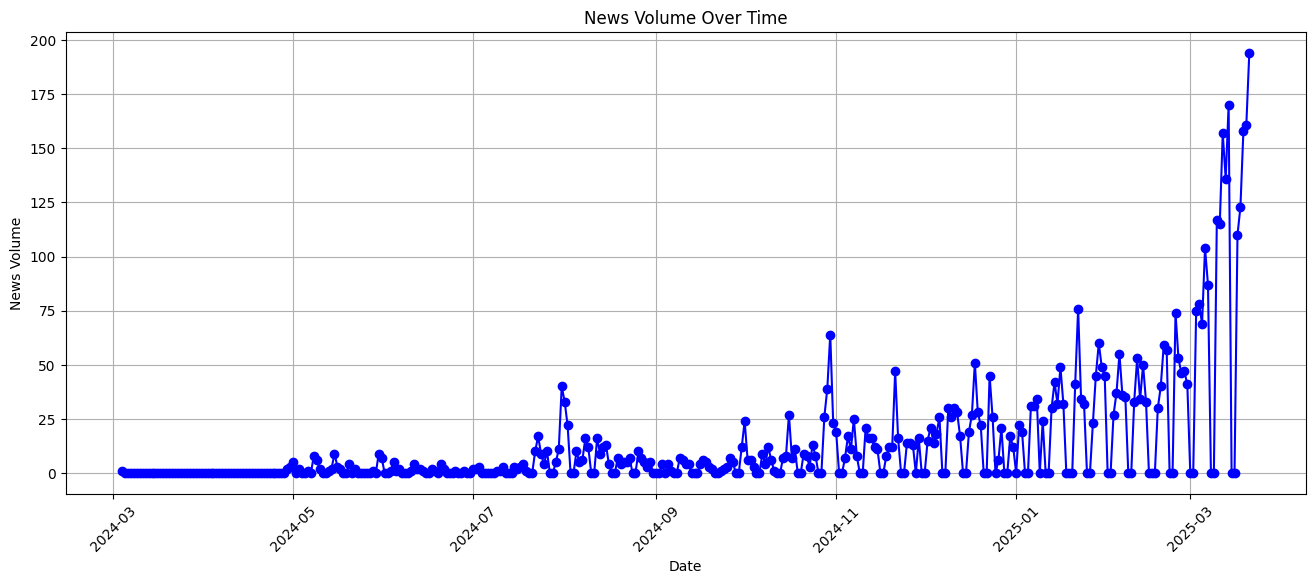

In [40]:
# Resample tweets by day to analyze volume over time
# Convert 'Date' column to DatetimeIndex and set it as index
merge_df['date'] = pd.to_datetime(merge_df['date'])  # Convert 'Date' to datetime objects
merge_df.set_index('date', inplace=True)            # Set 'Date' column as the index

# Now you can apply resample
tweet_volume = merge_df.resample("d").size()

# Plot
plt.figure(figsize=(16, 6))
plt.plot(tweet_volume.index, tweet_volume.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("News Volume")
plt.title("News Volume Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
